In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Importar el dataset
datos = pd.read_csv(filepath_or_buffer = "C:/Users/luish/Desktop/Programacion/Extraccion de Conocimientos de BD/UTEQ/Regresion_Logistica/data/usuarios_win_mac_lin.csv")
datos

duracion  paginas  acciones  valor  clase
0         7.0        2         4      8      2
1        21.0        2         6      6      2
2        57.0        2         4      4      2
3       101.0        3         6     12      2
4       109.0        2         6     12      2
..        ...      ...       ...    ...    ...
165      13.0        1         7     42      0
166      12.0        1         2      6      0
167      13.0        1         3      9      0
168      13.0        1         7     28      0
169      12.0        1         6     18      0

[170 rows x 5 columns]

In [3]:
# descripcion de los datos
datos.describe()

duracion     paginas    acciones       valor       clase
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   111.075729    2.041176    8.723529   32.676471    0.752941
std    202.453200    1.500911    9.136054   44.751993    0.841327
min      1.000000    1.000000    1.000000    1.000000    0.000000
25%     11.000000    1.000000    3.000000    8.000000    0.000000
50%     13.000000    2.000000    6.000000   20.000000    0.000000
75%    108.000000    2.000000   10.000000   36.000000    2.000000
max    898.000000    9.000000   63.000000  378.000000    2.000000

In [4]:
# Verificar si hay datos nulos
print(datos.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


C:\Users\luish\AppData\Local\Temp\ipykernel_8704\3943860519.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datos.drop(['clase'],1).hist()


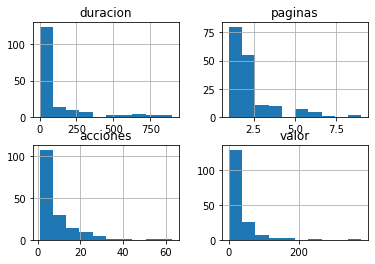

In [5]:
datos.drop(['clase'],1).hist()
plt.show()

c:\Users\luish\Desktop\Programacion\Extraccion de Conocimientos de BD\UTEQ\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


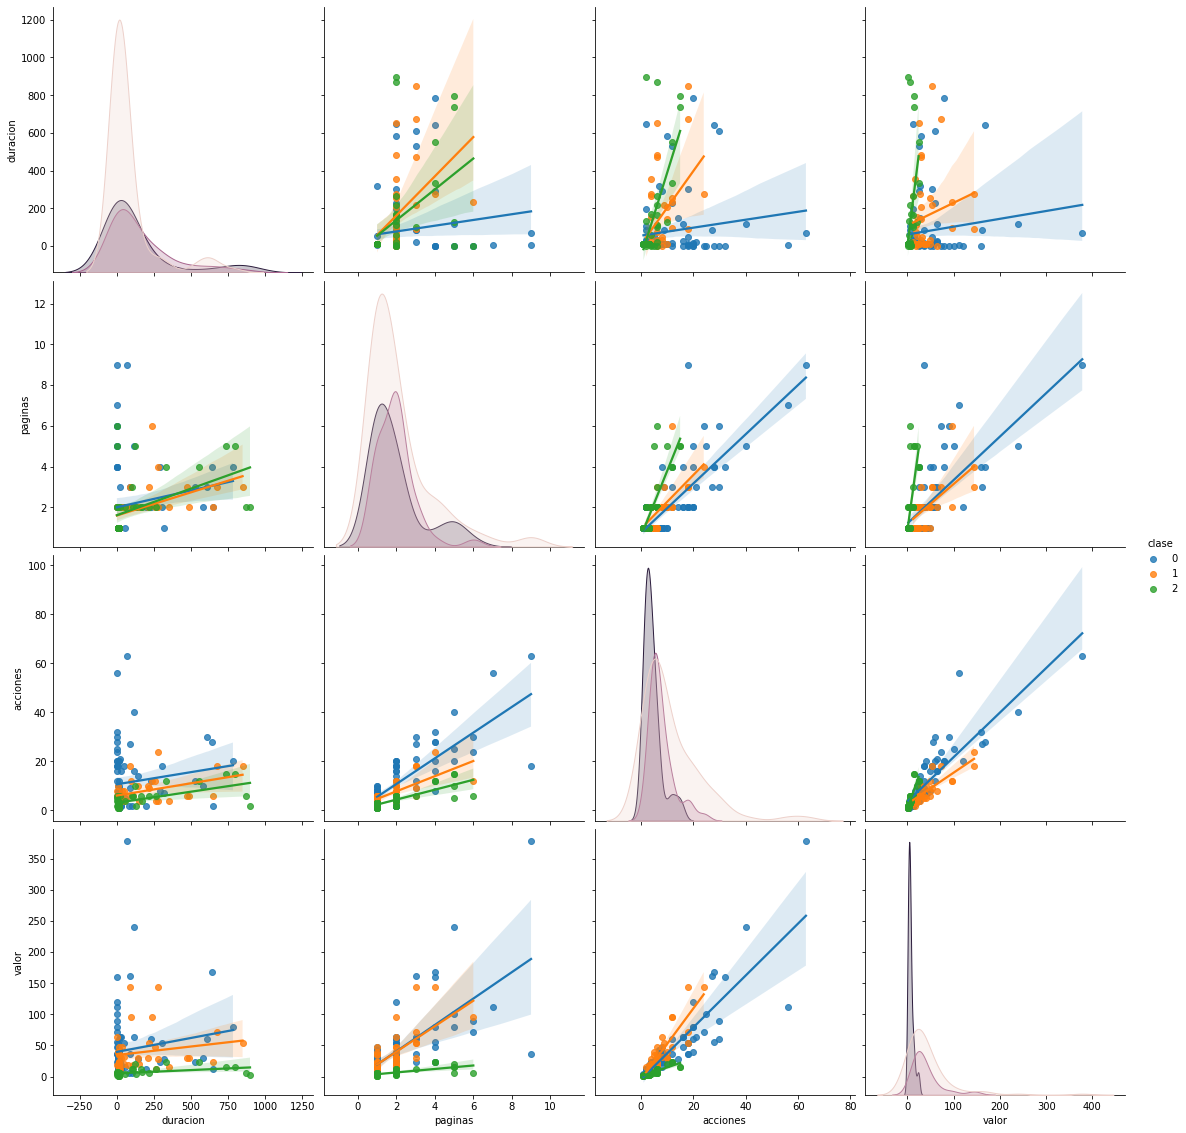

In [6]:
sb.pairplot(datos.dropna(), hue='clase', size=4, vars=["duracion","paginas","acciones","valor"],kind='reg')

In [7]:
X = np.array(datos.drop(['clase'],1))
y = np.array(datos['clase'])
X.shape

C:\Users\luish\AppData\Local\Temp\ipykernel_8704\2569882770.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(datos.drop(['clase'],1))


(170, 4)

In [8]:
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X,y)

LogisticRegression(max_iter=3000)

In [9]:
predictions = model.predict(X)
print(predictions) # 0 = win, 1 = mac, 2 = lin

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0
 0 1 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [10]:
model.score(X,y)

0.7764705882352941

In [11]:
validation_size = 0.28
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed, shuffle=True)

In [12]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state = seed, shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.712179 (0.069954)


In [13]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8541666666666666


In [14]:
print(confusion_matrix(Y_validation, predictions))

[[24  0  2]
 [ 5  4  0]
 [ 0  0 13]]


In [15]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       1.00      0.44      0.62         9
           2       0.87      1.00      0.93        13

    accuracy                           0.85        48
   macro avg       0.90      0.79      0.81        48
weighted avg       0.87      0.85      0.84        48



In [16]:
X2 = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [10]})

In [17]:
model.predict(X2)

c:\Users\luish\Desktop\Programacion\Extraccion de Conocimientos de BD\UTEQ\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([2], dtype=int64)

In [18]:
X3 = pd.DataFrame({'duracion': [111], 'paginas': [2], 'acciones': [8], 'valor': [32]})

In [19]:
model.predict(X3)

c:\Users\luish\Desktop\Programacion\Extraccion de Conocimientos de BD\UTEQ\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0], dtype=int64)